In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### kutuphaneleri  yükledik 

In [44]:
data=pd.read_csv("starbucks.csv")
data.head()

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


###### df adında yeni bir data oluşturalım  

In [45]:
df=data.copy()
df

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...,...
72,73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
73,74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
74,75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
75,76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  77 non-null     int64  
 1   item        77 non-null     object 
 2   calories    77 non-null     int64  
 3   fat         77 non-null     float64
 4   carb        77 non-null     int64  
 5   fiber       77 non-null     int64  
 6   protein     77 non-null     int64  
 7   type        77 non-null     object 
dtypes: float64(1), int64(5), object(2)
memory usage: 4.9+ KB


In [47]:
df.isnull().sum()

Unnamed: 0    0
item          0
calories      0
fat           0
carb          0
fiber         0
protein       0
type          0
dtype: int64

In [48]:
colum=["Sıra Numarası", "Ürün", "Kalori", "Yağ", "Karbonhidrat", "Lif", "Protein", "Tür"]
df.columns=colum
df

,Sıra Numarası,Ürün,Kalori,Yağ,Karbonhidrat,Lif,Protein,Tür
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...,...
72,73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
73,74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
74,75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
75,76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


#### Sıra Numarsı değişkenimizi silelim 

In [49]:
df = df.drop("Sıra Numarası", axis=1)
df

,Ürün,Kalori,Yağ,Karbonhidrat,Lif,Protein,Tür
0,8-Grain Roll,350,8.0,67,5,10,bakery
1,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,Apple Fritter,420,20.0,59,0,5,bakery
3,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...
72,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
73,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
74,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
75,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


In [50]:
df.columns

Index(['Ürün', 'Kalori', 'Yağ', 'Karbonhidrat', 'Lif', 'Protein', 'Tür'], dtype='object')

##### Ürün: Yiyecek veya içeceğin adını temsil eder.
#### Kalori: Bir yiyecekte bulunan enerji miktarını temsil eder.
#### Yağ: Yiyecekteki yağ miktarını temsil eder. Yağlar, enerji kaynağı olarak kullanılır.
#### Karbonhidrat: Yiyecekteki karbonhidrat miktarını temsil eder. Karbonhidratlar, vücut için ana enerji kaynağıdır.
#### Lif: Yiyecekteki lif miktarını temsil eder. Lif, sindirilemeyen bir besin maddesidir ve sindirim sistemine fayda sağlar.
#### Protein: Yiyecekteki protein miktarını temsil eder. Proteinler, hücrelerin yapısını oluşturur, vücut dokularının yenilenmesini destekler.
#### Tür: Yiyeceğin veya içeceğin türünü temsil eder.



In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kalori,77.0,338.831169,105.368701,80.0,300.0,350.0,420.0,500.0
Yağ,77.0,13.766234,7.095488,0.0,9.0,13.0,18.0,28.0
Karbonhidrat,77.0,44.870130,16.551634,16.0,31.0,45.0,59.0,80.0
Lif,77.0,2.220779,2.112764,0.0,0.0,2.0,4.0,7.0
Protein,77.0,9.480519,8.079556,0.0,5.0,7.0,15.0,34.0


In [61]:
df["Ürün"].unique()

array(['8-Grain Roll', 'Apple Bran Muffin', 'Apple Fritter',
       'Banana Nut Loaf', 'Birthday Cake Mini Doughnut',
       'Blueberry Oat Bar', 'Blueberry Scone',
       'Bountiful Blueberry Muffin', 'Butter Croissant ', 'Cheese Danish',
       'Chocolate Chunk Cookie', 'Chocolate Cinnamon Bread',
       'Chocolate Croissant', 'Chocolate Old-Fashioned Doughnut',
       'Chonga Bagel', 'Cinnamon Chip Scone', 'Cranberry Orange Scone',
       'Double Chocolate Brownie', 'Double Fudge Mini Doughnut',
       'Everything with Cheese Bagel', 'Ginger Molasses Cookie',
       'Iced Lemon Pound Cake', 'Mallorca Sweet Bread',
       'Maple Oat Pecan Scone ', 'Marble Pound Cake',
       'Marshmallow Dream Bar', 'Morning Bun', 'Multigrain Bagel',
       'Old-Fashioned Glazed Doughnut', 'Outrageous Oatmeal Cookie',
       'Petite Vanilla Bean Scone', 'Plain Bagel', 'Pumpkin Bread',
       'Pumpkin Scone ', 'Raspberry Scone', 'Raspberry Swirl Pound Cake',
       'Reduced-Fat Banana Chocolate Chip C

In [67]:
df["Tür"].unique()

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [82]:
df.groupby("Tür")["Ürün"].count()

Tür
bakery           41
bistro box        8
hot breakfast     8
parfait           3
petite            9
salad             1
sandwich          7
Name: Ürün, dtype: int64

##### Guruplama işlemi yaptık şimdi de bunu grafik olarak sizlere gösterelim 

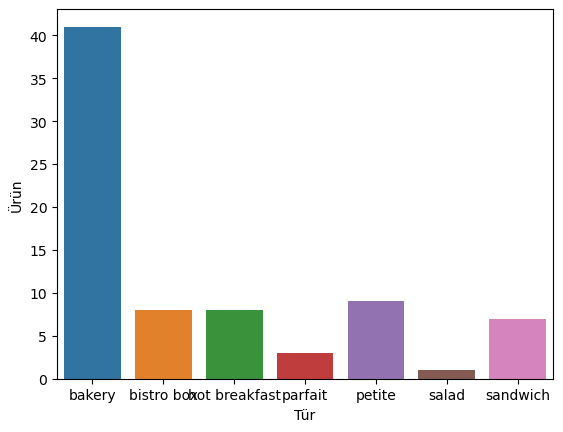

In [84]:
df_grouped = df.groupby('Tür')['Ürün'].count().reset_index()
sns.barplot(x='Tür', y='Ürün', data=df_grouped)
plt.show()


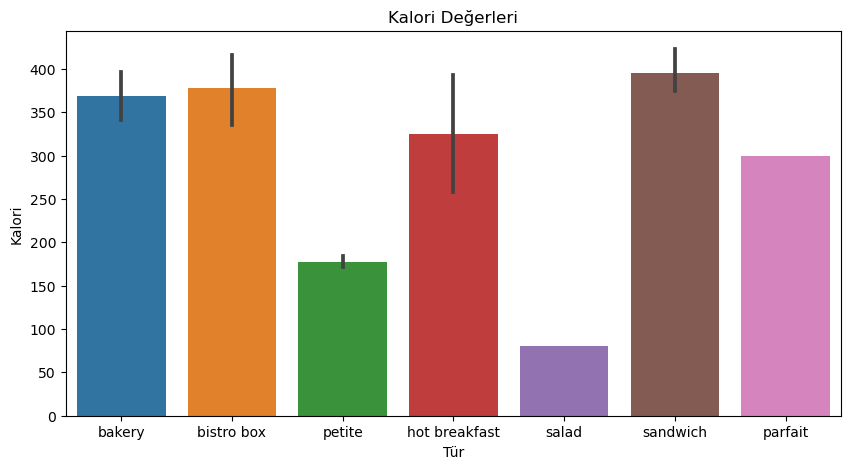

In [90]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Tür", y="Kalori", data=df)
plt.title("Kalori Değerleri")
plt.show()


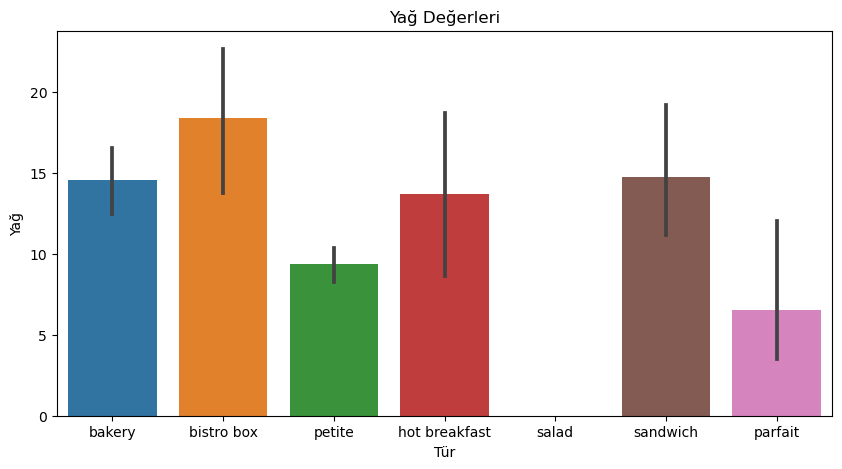

In [91]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Tür", y="Yağ", data=df)
plt.title("Yağ Değerleri")
plt.show()


In [93]:
df

,Ürün,Kalori,Yağ,Karbonhidrat,Lif,Protein,Tür
0,8-Grain Roll,350,8.0,67,5,10,bakery
1,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,Apple Fritter,420,20.0,59,0,5,bakery
3,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...
72,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
73,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
74,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
75,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


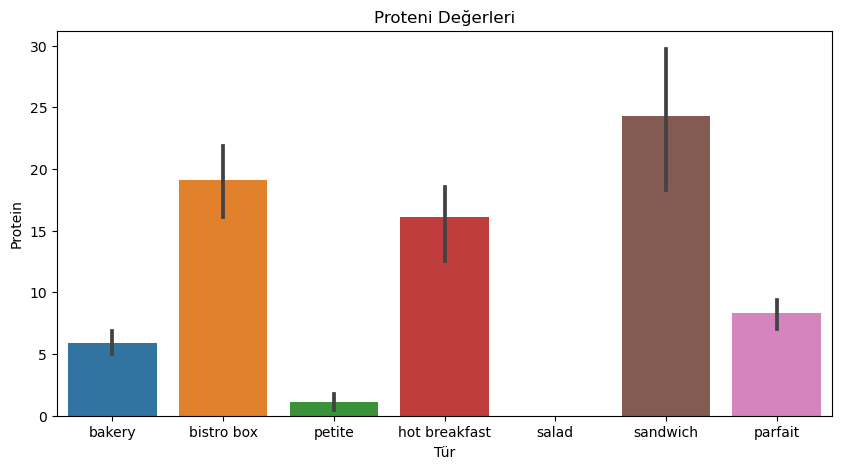

In [96]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Tür", y="Protein", data=df)
plt.title("Proteni Değerleri")
plt.show()


#####   veri çerçevesindeki sayısal sütunlar arasındaki korelasyonları hesaplaıyalım

In [98]:
df.corr()

,Kalori,Yağ,Karbonhidrat,Lif,Protein
Kalori,1.000000,0.758682,0.674999,0.260645,0.410398
Yağ,0.758682,1.000000,0.144547,-0.028549,0.223470
Karbonhidrat,0.674999,0.144547,1.000000,0.213044,-0.050789
Lif,0.260645,-0.028549,0.213044,1.000000,0.488564
Protein,0.410398,0.223470,-0.050789,0.488564,1.000000


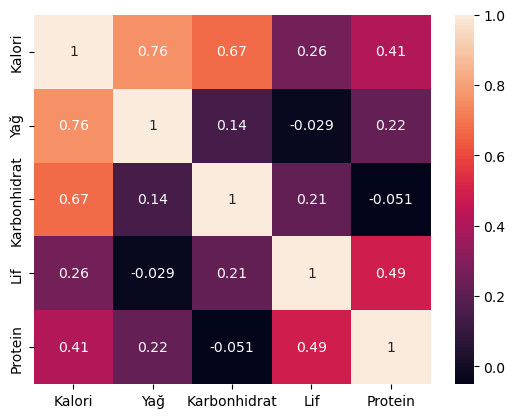

In [100]:
sns.heatmap(df.corr(),annot=True);

###### şimdi kalori ile yağ a bakalım

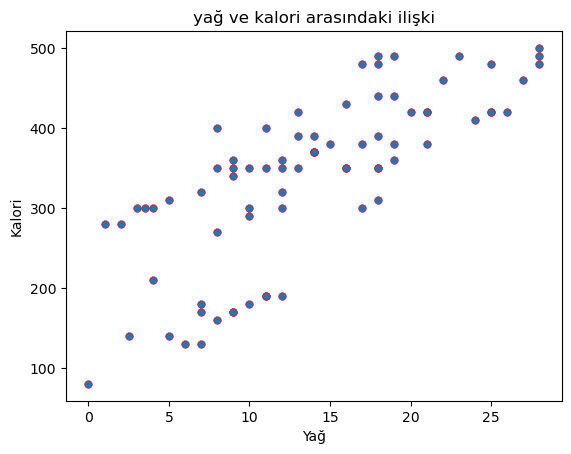

In [103]:
plt.title("yağ ve kalori arasındaki ilişki")
sns.scatterplot(x="Yağ",y="Kalori",data=df,s=30,edgecolor="red");


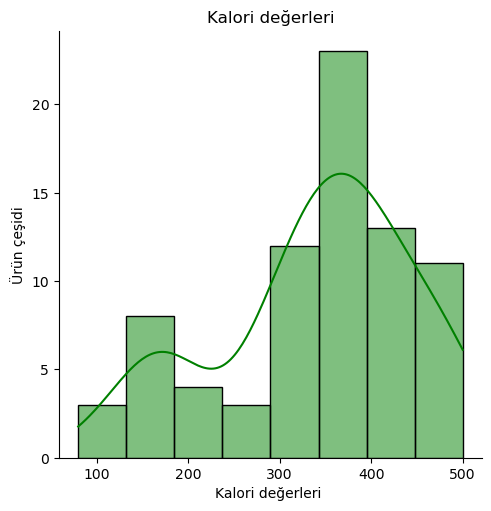

In [112]:
sns.displot(x="Kalori",data=df,color="green",kde=True)
plt.title("Kalori değerleri")
plt.xlabel("Kalori değerleri ")
plt.ylabel("Ürün çeşidi");


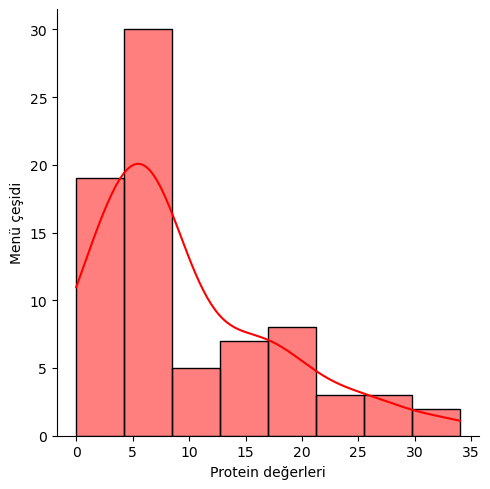

In [113]:
sns.displot(x="Protein",data=df,color="red",kde=True)
plt.xlabel("Protein değerleri")
plt.ylabel("Menü çeşidi");

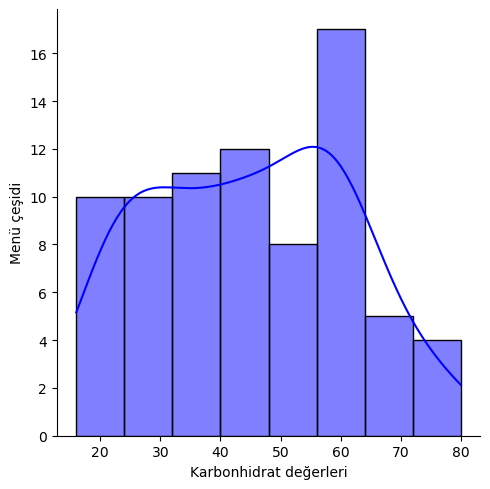

In [126]:
sns.displot(x="Karbonhidrat",data=df,color="Blue",kde=True)
plt.xlabel("Karbonhidrat değerleri")
plt.ylabel("Menü çeşidi");